# Redes Neuronales Recurrentes (RNN)

## Importar las librerías

In [1]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/MyDrive/deeplearning-az/Notebooks/Part 3 - Recurrent Neural Networks (RNN)"

Mounted at /content/drive
/content/drive/MyDrive/deeplearning-az/Notebooks/Part 3 - Recurrent Neural Networks (RNN)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from datetime import datetime

## Definición de funciones

In [3]:
# Crear una estructura de datos con 60 timesteps y 1 salida
def create_sequences(data, time_steps):
    X_sequence = []
    for i in range(time_steps, data.shape[0]):
        X_sequence.append(data[i - time_steps:i, 0])
    return np.array(X_sequence)

In [4]:
def model_builder():
    model = Sequential()
    model.add(LSTM(units=50,
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(units=50,
                   return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(units=50,
                   return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1))
    model.compile(optimizer="adam",
                  loss="mean_squared_error")
    return model

## Parte 1 - Preprocesado de los datos

### Importación y preparación de los datasets de entrenamiento y test

In [5]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train["Date"] = pd.to_datetime(dataset_train["Date"])
dataset_train.set_index("Date", inplace=True)
training_set  = dataset_train.iloc[:, 0:1].values
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

time_steps = 60  # 20 días hábiles al mes, lo que equivale a un trimestre
X_train = create_sequences(data=training_set_scaled, time_steps=time_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.array(training_set_scaled[-(training_set_scaled.shape[0] - time_steps):, 0])

In [6]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test["Date"] = pd.to_datetime(dataset_test["Date"])
dataset_test.set_index("Date", inplace=True)
full_dataset = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)

data = full_dataset[len(full_dataset) - len(dataset_test) - time_steps:].values
data = data.reshape(-1, 1)
data = scaler.transform(data)

X_test = create_sequences(data=data, time_steps=time_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = dataset_test.iloc[:, 0:1].values

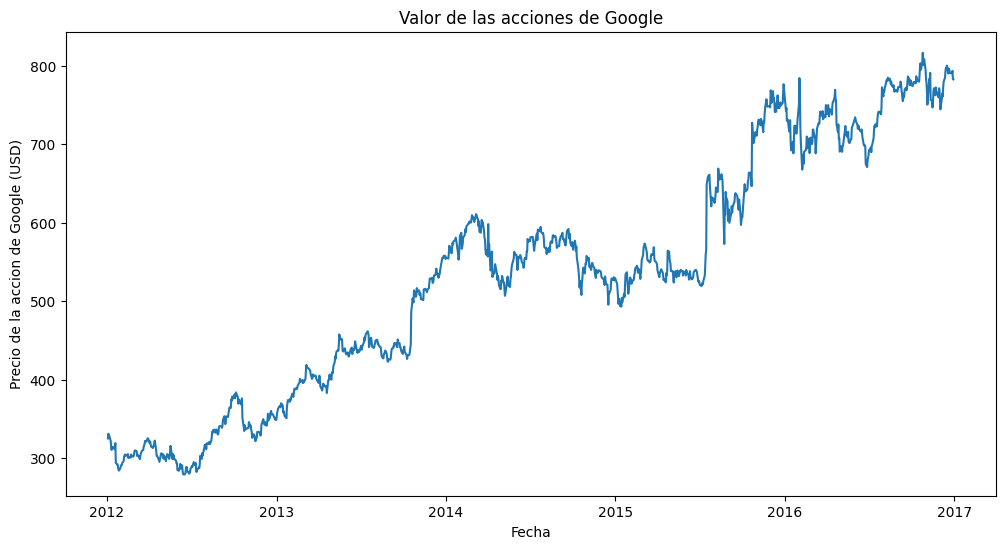

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(dataset_train.index, training_set)
plt.title("Valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google (USD)")
plt.subplots_adjust(bottom=0.3)
plt.show()

## Parte 2 - Construcción de la RNN

### Construyendo la arquitectura de la RNN

In [8]:
model = model_builder()

### Ajustar la RNN al conjunto de entrenamiento

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 143ms/step - loss: 0.0445
Epoch 2/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0042
Epoch 13/100

## Parte 3 - Ajustar las predicciones y visualizar los resultados

### Obtener la predicciones de las acciones con la RNN para Enero de 2017

In [10]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

1/1 [==============================] - 2s 2s/step


### Visualización de los resultados

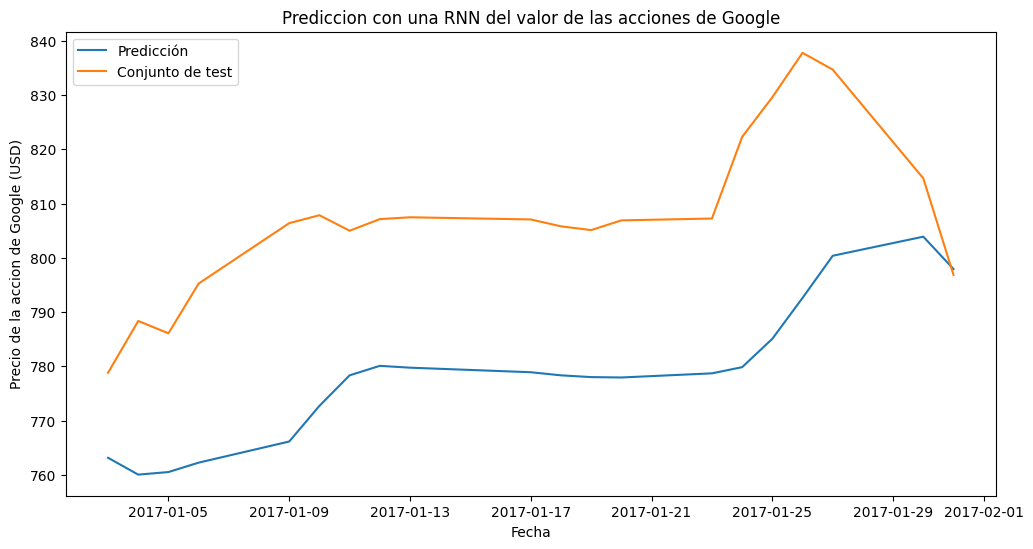

In [11]:
plt.figure(figsize=(12, 8))
#plt.plot(dataset_train.index, training_set, label="Conjunto de entrenamiento")
plt.plot(dataset_test.index, y_pred, label="Predicción")
plt.plot(dataset_test.index, y_test, label="Conjunto de test")
plt.title("Prediccion con una RNN del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google (USD)")
plt.legend()
plt.subplots_adjust(bottom=0.3)
plt.show()

## Parte 4: Predicción del valor de entrada de las acciones de Google mañana

In [12]:
last_sequences = training_set_scaled[-time_steps:]

last_sequences_reshaped = last_sequences.reshape((1, time_steps, 1))
prediction = model.predict(last_sequences_reshaped)
prediction = scaler.inverse_transform(prediction)

print("La previsión de acciones de Google para mañana es de:", round(prediction[0][0], 4), "(USD)")

1/1 [==============================] - 0s 48ms/step
La previsión de acciones de Google para mañana es de: 763.1289 (USD)


### Predicción de los próximos 20 días (nada fiable)

In [ ]:
"""
predictions = []
days_prediction = 20

for _ in range(days_prediction):
    last_sequences = training_set_scaled[-time_steps:]
    last_sequences_reshaped = last_sequences.reshape((1, time_steps, 1))
    prediction = model.predict(last_sequences_reshaped)
    predictions.append(prediction[0])
    training_set_scaled = np.append(training_set_scaled, prediction)

predictions = scaler.inverse_transform(predictions)
"""

In [ ]:
"""
plt.plot(y_test[-days_prediction:], color="red", label="Precio Real de la Accion de Google")
plt.plot(np.array(predictions), color="blue", label="Precio Predicho de la Accion de Google")
plt.title("Prediccion con una RNN del valor de las acciones de Google")
plt.xlabel("Fecha")
plt.ylabel("Precio de la accion de Google")
plt.legend()
plt.show()
"""